In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
import pandas as pd
from pandas import DataFrame
from sklearn import datasets
import numpy as np

In [2]:
dataframe = pd.read_csv("pruebasClusterMuseos.csv")
dataframe.head()

,Unnamed: 0,ids,Nombre,Calle,Barrio,Precio,Calificacion,Tipo_Museo,cluster
0,0,1,Casa.Museo.Lope.de.Vega,CERVANTES,CORTES,12,4.4,6,0
1,1,2,Casita.-.Museo.del.Raton.Perez,ARENAL,SOL,27,4.2,6,3
2,2,3,Castillo.de.la.Alameda,ANTONIOSANCHA,ALAMEDADEOSUNA,23,4.2,12,1
3,3,4,Cason.del.Buen.Retiro,ALFONSOXII,LOSJERONIMOS,11,4.4,6,0
4,4,5,Centro.Social.y.Cultural.La.Casa.Encendida,VALENCIA,EMBAJADORES,19,4.4,1,2


In [3]:
nom = dataframe['Nombre'].values
calle = dataframe['Calle'].values
barrio = dataframe['Barrio'].values
precio = dataframe['Precio'].values
Cal = dataframe['Calificacion'].values
tipo = dataframe['Tipo_Museo'].values
ids = dataframe['ids'].values
Data = {'x' : precio, 'y' : Cal, 'z' : tipo}
df = DataFrame(Data,columns=['x','y','z'])
df

,x,y,z
0,12,4.4,6
1,27,4.2,6
2,23,4.2,12
3,11,4.4,6
4,19,4.4,1
...,...,...,...
61,17,3.4,3
62,17,4.5,4
63,19,4.4,3
64,14,4.2,8


In [4]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

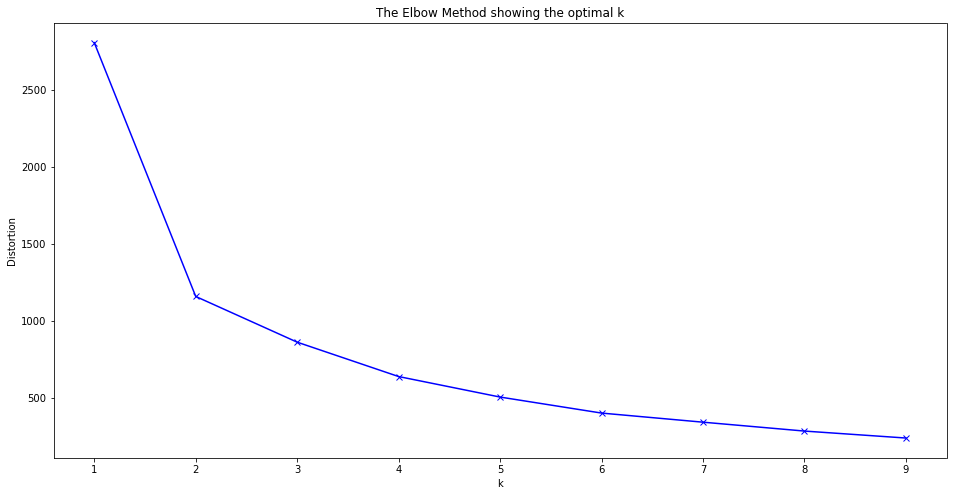

In [5]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [6]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centroids = kmeanModel.cluster_centers_
print(centroids)
centP = []
centC = []
centT = []

[[22.6875      4.425       8.375     ]
 [18.06666667  4.32        3.6       ]
 [27.125       4.3         5.5625    ]
 [14.          4.44545455  8.81818182]
 [11.25        4.3625      3.5       ]]


In [8]:
lenc = len(centroids)
xc = 0
while xc < lenc:
    centP.append(centroids[xc][0])
    centC.append(centroids[xc][1])
    centT.append(centroids[xc][2])
    xc +=1
print(centP)
print(centC)
print(centT)

[22.6875, 18.066666666666666, 27.125, 14.0, 11.250000000000002]
[4.425, 4.32, 4.3, 4.445454545454545, 4.3625]
[8.375, 3.6, 5.5625, 8.818181818181818, 3.5000000000000004]


In [9]:
centroidData = {'Centroide_Precio': centP, 'Centroide_Calificacion': centC, 'Centroide_Tipo': centT }
centroidDatas = DataFrame(centroidData,columns=['Centroide_Precio',  'Centroide_Calificacion', 'Centroide_Tipo'] )
centroidDatas.to_csv('centroidMuseo.csv')

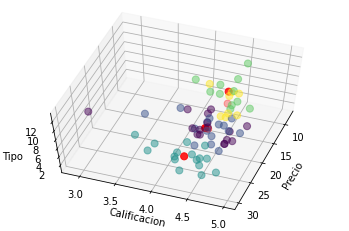

In [10]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection = '3d')
ax.scatter(df['x'], df['y'], df['z'], c= kmeanModel.labels_.astype(float), s=50, alpha=0.5)
ax.set_xlabel('Precio')
ax.set_ylabel('Calificacion')
ax.set_zlabel('Tipo')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:,2], c='red', s=50)
ax.view_init(60, 20)
plt.show()

In [11]:
cluster = kmeanModel.labels_

In [12]:
dataCluster = {'ids': ids,'Nombre': nom, 'Calle': calle, 'Barrio': barrio, 'Precio': precio, 'Calificacion': Cal, 'Tipo_Museo': tipo,  'cluster' : cluster }
dfCluster = DataFrame(dataCluster,columns=[ 'ids','Nombre','Calle','Barrio','Precio','Calificacion','Tipo_Museo','cluster'] )
dfCluster

,ids,Nombre,Calle,Barrio,Precio,Calificacion,Tipo_Museo,cluster
0,1,Casa.Museo.Lope.de.Vega,CERVANTES,CORTES,12,4.4,6,4
1,2,Casita.-.Museo.del.Raton.Perez,ARENAL,SOL,27,4.2,6,2
2,3,Castillo.de.la.Alameda,ANTONIOSANCHA,ALAMEDADEOSUNA,23,4.2,12,0
3,4,Cason.del.Buen.Retiro,ALFONSOXII,LOSJERONIMOS,11,4.4,6,4
4,5,Centro.Social.y.Cultural.La.Casa.Encendida,VALENCIA,EMBAJADORES,19,4.4,1,1
...,...,...,...,...,...,...,...,...
61,63,Real.Monasterio.de.Santa.Isabel,SANTAISABEL,EMBAJADORES,17,3.4,3,1
62,64,Real.Monasterio.de.la.Encarnacion,ENCARNACION,PALACIO,17,4.5,4,1
63,65,Templo.de.Debod,FERRAZ,CASADECAMPO,19,4.4,3,1
64,66,The.Robot.Museum.(Museo.del.Robot),ALBERTOAGUILERA,UNIVERSIDAD,14,4.2,8,3


In [13]:
dfCluster.to_csv('pruebasClusterMuseos.csv')